In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#imports used for K-Neighbors Classifier
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
#scikit-learn metrics is used for caluculating model accuracy
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

#imports used for naive_bayes Classifier
from sklearn.naive_bayes import MultinomialNB

#imports used for Decision Tree Classifier


In [2]:
# Establishing path for csv file and reading the csv file
path = '/content/Project.csv'
data = pd.read_csv(path)

In [3]:
# Acessing first five rows of data frame
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


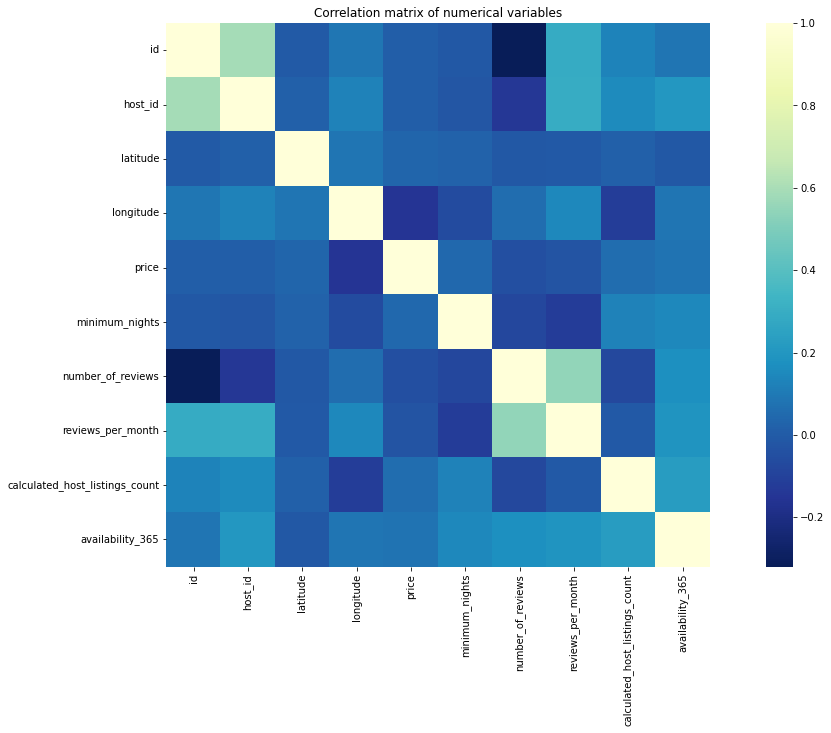

In [4]:
# Plotting the correlation matrix for the attributes of data
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(data.corr(), square=True, cmap='YlGnBu_r')
plt.title(title)
plt.ioff()

### DATA PRE-PROCESSING


In [5]:
# Dropping the unwanted columns 
data = data.drop(['name','id','host_name','last_review','neighbourhood'],axis = 1)

In [6]:
# Rounding of the values
data['latitude'] = data['latitude'].apply(lambda x: round(x, 2))
data['longitude'] = data['longitude'].apply(lambda x: round(x, 2))

In [7]:
# Replacing and eliminating nan values
data['reviews_per_month'].fillna(0,inplace=True)
a=data['price'].mode()
data['price'].fillna(a,inplace=True)

In [8]:
# Changing categorical data to numerical data
# In the map we infered that brooklyn and manhattan are very very near so we combined them to single are

NB_group = {'Brooklyn': 1,'Manhattan': 1,'Queens':3,'Staten Island':2,'Bronx':4} #Accuracy: 0.8411616333765083

data.neighbourhood_group= [NB_group[item] for item in data.neighbourhood_group]
data.head()

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,40.65,-73.97,Private room,149,1,9,0.21,6,365
1,2845,1,40.75,-73.98,Entire home/apt,225,1,45,0.38,2,355
2,4632,1,40.81,-73.94,Private room,150,3,0,0.00,1,365
3,4869,1,40.69,-73.96,Entire home/apt,89,1,270,4.64,1,194
4,7192,1,40.80,-73.94,Entire home/apt,80,10,9,0.10,1,0


In [9]:
# Changing categorical data to numerical data

RM_Type = {'Shared room': 1,'Entire home/apt': 2,'Private room':3}
data.room_type= [RM_Type[item] for item in data.room_type]
data.head()

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,40.65,-73.97,3,149,1,9,0.21,6,365
1,2845,1,40.75,-73.98,2,225,1,45,0.38,2,355
2,4632,1,40.81,-73.94,3,150,3,0,0.00,1,365
3,4869,1,40.69,-73.96,2,89,1,270,4.64,1,194
4,7192,1,40.80,-73.94,2,80,10,9,0.10,1,0


In [10]:
# X Data frame
X = data[['room_type','price']]
# y data frame
y=data['neighbourhood_group'].values

In [11]:
# Splitting the data set into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
expLog = pd.DataFrame(columns=["classifier", "Accuracy"])

##          ***K-NEIGHBOURS CLASSIFIER*** 

In [13]:
#Creating KNN classifier
K_N_Class = KNeighborsClassifier(n_neighbors=25)

#Trainig the model with the training data sets
K_N_Class .fit(X_train, y_train)

#Predicting the data 
y_pred1 = K_N_Class .predict(X_test)

In [14]:
# calucating the model accuracy
print("Accuracy Accuracy after hyper parameter tuning :",metrics.accuracy_score(y_test, y_pred1)*100)

Accuracy Accuracy after hyper parameter tuning : 85.0296543731679


In [15]:
temp = {'classifier': 'K_N_Class', 'Accuracy': metrics.accuracy_score(y_test, y_pred1)*100}
expLog = expLog.append(temp, ignore_index = True)

In [16]:
expLog

,classifier,Accuracy
0,K_N_Class,85.029654


In [17]:
#Hyper parameter tuning and the things to be tuned
leaf_size = list(range(1,10))
n_neighbors = list(range(1,30))
p=[1,2]
#Converting to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#creating new KNN objectss
knn_2 = KNeighborsClassifier()
#GridSearchCV is applied
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#fitting the model
best_model = clf.fit(X,y)
#printting the hyperparameters for increasing the accuracy
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 3
Best p: 1
Best n_neighbors: 16


In [18]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
K_N_Class  = KNeighborsClassifier(leaf_size=4,n_neighbors=21,p=1)

#Train the model using the training sets
K_N_Class .fit(X_train, y_train)

#Predict the response for test dataset
y_pred2 = K_N_Class .predict(X_test)

In [19]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy after hyper parameter tuning :",metrics.accuracy_score(y_test, y_pred2)*100)

Accuracy after hyper parameter tuning : 85.08419115140772


In [20]:
temp = {'classifier': 'KNN with best parameter ', 'Accuracy': metrics.accuracy_score(y_test, y_pred2)*100}
expLog = expLog.append(temp, ignore_index = True)

In [21]:
expLog

,classifier,Accuracy
0,K_N_Class,85.029654
1,KNN with best parameter,85.084191


# **NAIVE_BAYES CLASSIFIER**

In [22]:

from sklearn.naive_bayes import MultinomialNB

#multinomial function is used in Naive Bayes model
gnb = MultinomialNB()
# training the model on training set
gnb.fit(X_train, y_train)
# Applying predictions on test data set
y_pred3 = gnb.predict(X_test)
  
# finding the ourput result
print("Accuracy of MultinomialNB Naive Bayes model :", metrics.accuracy_score(y_test, y_pred3)*100)

Accuracy of MultinomialNB Naive Bayes model : 85.11827663780763


In [23]:
temp = {'classifier': 'Naive_Bayes ', 'Accuracy': metrics.accuracy_score(y_test, y_pred3)*100}
expLog = expLog.append(temp, ignore_index = True)

In [24]:
expLog

,classifier,Accuracy
0,K_N_Class,85.029654
1,KNN with best parameter,85.084191
2,Naive_Bayes,85.118277


# **DECISION TREE CLASSIFIER**

In [25]:
from sklearn import neighbors, linear_model, svm, tree, ensemble
#intialising the classifier
classifier = tree.DecisionTreeClassifier()
# training the model on training set
classifier.fit(X_train,y_train)
#predicting the iutput
y_pred4 = classifier.predict(X_test)

print("Accuracy of Decision Tree Classifier :", metrics.accuracy_score(y_test, y_pred4)*100)

Accuracy of Decision Tree Classifier : 84.96148340036812


In [26]:
temp = {'classifier': 'Decision_Tree_Classifier ', 'Accuracy': metrics.accuracy_score(y_test, y_pred4)*100}
expLog = expLog.append(temp, ignore_index = True)

In [27]:
expLog

,classifier,Accuracy
0,K_N_Class,85.029654
1,KNN with best parameter,85.084191
2,Naive_Bayes,85.118277
3,Decision_Tree_Classifier,84.961483


In [28]:
# Created a new column as booking for cheking how the room is avilable over 365 days
data['booking'] = [1 if i != 0 else 0 for i in data.availability_365]

In [29]:
booked_rooms = data.groupby(['neighbourhood_group','room_type'], as_index = False)['booking'].mean()\
              .sort_values('booking', ascending = False).reset_index(drop = True)
booked_rooms

,neighbourhood_group,room_type,booking
0,2,3,0.909574
1,2,1,0.888889
2,2,2,0.863636
3,4,2,0.839050
4,4,3,0.837423
5,4,1,0.833333
6,3,1,0.818182
7,3,3,0.766904
8,3,2,0.739504
9,1,1,0.721165


In [30]:
#Finding the rate of occupancy of the room over 365 days in certain neighborhood_group and type of room
data['Rate_of_Occupancy'] = (365 - data['availability_365'])/365

occup_rate = data.groupby(['neighbourhood_group', 'room_type'], as_index = False)['Rate_of_Occupancy'].mean()\
                .sort_values('Rate_of_Occupancy', ascending = False).reset_index(drop = True)
occup_rate

,neighbourhood_group,room_type,Rate_of_Occupancy
0,2,1,0.822527
1,1,3,0.723926
2,1,2,0.702007
3,3,2,0.637624
4,3,3,0.591171
5,4,1,0.577489
6,1,1,0.570382
7,4,2,0.567123
8,4,3,0.530599
9,2,2,0.512126


In [31]:
# we created an income with respect to the booking rate in a location with respect to type of room

income_BR = data.groupby(['neighbourhood_group','room_type']).agg({'booking':'mean', 'price':'mean'})
income_BR

booking       price
neighbourhood_group room_type                      
1                   1          0.721165   71.194849
                    2          0.637710  219.454258
                    3          0.588605   94.248095
2                   1          0.888889   57.444444
                    2          0.863636  173.846591
                    3          0.909574   62.292553
3                   1          0.818182   69.020202
                    2          0.739504  147.050573
                    3          0.766904   71.762456
4                   1          0.833333   59.800000
                    2          0.839050  127.506596
                    3          0.837423   66.788344

In [32]:
#create model dataframe by appending the income_BR and occup_rate
model = pd.merge(income_BR, occup_rate , how = 'left', on=['neighbourhood_group', 'room_type'])

#createed a new colum of income
model['WAIncome'] = model['price'] * 365 * model['Rate_of_Occupancy'] * model['booking']
model = model.sort_values(['Rate_of_Occupancy'], ascending = True).reset_index(drop = True)

model

,neighbourhood_group,room_type,booking,price,Rate_of_Occupancy,WAIncome
0,2,3,0.909574,62.292553,0.379831,7855.206575
1,3,1,0.818182,69.020202,0.473461,9758.943192
2,2,2,0.863636,173.846591,0.512126,28065.134528
3,4,3,0.837423,66.788344,0.530599,10831.913494
4,4,2,0.839050,127.506596,0.567123,22145.776276
5,1,1,0.721165,71.194849,0.570382,10689.103462
6,4,1,0.833333,59.800000,0.577489,10504.036111
7,3,3,0.766904,71.762456,0.591171,11875.282959
8,3,2,0.739504,147.050573,0.637624,25308.405233
9,1,2,0.637710,219.454258,0.702007,35859.277367


In [33]:
#setting a threshold value of income
thresh =  model['WAIncome'].mean()

#select the property with the highest income that exceeds the threshold and the lowest occupancy rate.

for i, row, in model[['WAIncome', 'neighbourhood_group', 'room_type']].iterrows():
    if model.loc[i, 'WAIncome'] > thresh:
        if model.loc[i, 'WAIncome'] > model.loc[i+1, 'WAIncome']:
            print(f"Location Recomended for You: {model.loc[i, 'neighbourhood_group']}")
            print(f"Best room type for you: {model.loc[i, 'room_type']}")
            print(f"Estimated  Income is: {model.loc[i, 'WAIncome']}")
            break

Location Recomended for You: 2
Best room type for you: 2
Estimated  Income is: 28065.134527904298
